In [1]:
import IPythonImporter
import GameFramework as gf
import SequentialReverseAuction as srg
import Shapley as sh

import time
import numpy as np
from pathos.multiprocessing import ProcessingPool

importing Jupyter notebook from GameFramework.ipynb
importing Jupyter notebook from SequentialReverseAuction.ipynb
importing Jupyter notebook from Shapley.ipynb


In [2]:
# Generiere Szenarien
sc = gf.generateScenaries(agentsNumber=2, sitesNumber=2, skillsNumber=2, \
                          capacitiesNumber=(1,2), requestsNumber=(1,3))

print "Anzahl an Szenarien: " + str(len(sc))

Anzahl an Szenarien: 4096


In [3]:
# multiprocessing shapley
start = time.time()
results_shapley = ProcessingPool().map(sh.shapley, sc)
end = time.time()
print "Processing Time Shapley: " + str(end - start)

Processing Time Shapley: 900.073484898


In [9]:
# multiprocessing SRG
start = time.time()
results_srg = ProcessingPool().map(srg.sequentialReverseAuction, sc)
end = time.time()
print "Processing Time SRG: " + str(end - start)

Processing Time SRG: 0.385056972504


In [5]:
# Shapley aufbereiten
res_s = [r[2].values() for r in results_shapley if r != None]

ar_s = np.zeros((len(res_s), 2), dtype=np.dtype(int))
for idx, r in enumerate(res_s):
    ar_s[idx] = r

In [23]:
shapley_umsatz = np.sum(ar_s)
shapley_sum_min = np.sum(ar_s.min(axis=1))
shapley_sum_max = np.sum(ar_s.max(axis=1))

print shapley_umsatz
print shapley_sum_min
print shapley_sum_max
print float(shapley_sum_min)/shapley_sum_max

318080594
121150265
196930329
0.61519353375


In [21]:
# srg aufbereiten
res_r = [r[:,1] for r in results_srg if r is not None]
ar_r = np.zeros((len(results_srg), 2), dtype=np.dtype(int))

for idx, r in enumerate(res_r):
    if len(r) == 1: 
        ar_r[idx] = [int(r[0]), 0]
    else:
        ar_r[idx] = [int(r[0]), int(r[1])]

In [24]:
srg_umsatz = np.sum(ar_r)
srg_sum_min = np.sum(ar_r.min(axis=1))
srg_sum_max = np.sum(ar_r.max(axis=1))    
    
print srg_umsatz
print srg_sum_min
print srg_sum_max
print float(srg_sum_min)/srg_sum_max

252758528
39094808
213663720
0.18297354366


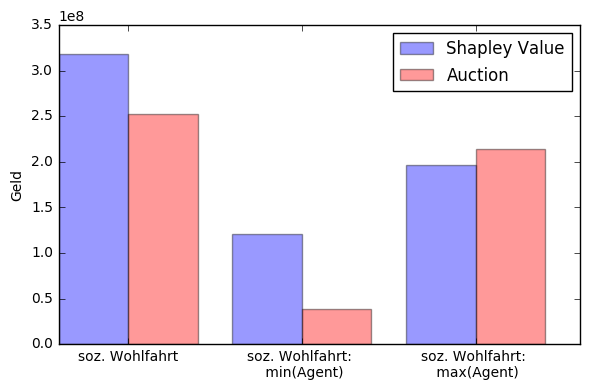

In [10]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 3
srg = (252758528, 39094808, 213663720)
shapley = (318080594, 121150265, 196930329)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.4

rects1 = plt.bar(index, shapley, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Shapley Value')

rects2 = plt.bar(index + bar_width, srg, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Auction')

plt.ylabel('Geld')
plt.xticks(index + bar_width, ('soz. Wohlfahrt', 'soz. Wohlfahrt: \n min(Agent)', 'soz. Wohlfahrt: \n max(Agent)'))
plt.legend()

plt.tight_layout()
plt.show()